In [1]:
using Flux,Distributions,CSV ,DataFrames,LinearAlgebra,Plots,Random

In [2]:

begin
    data=CSV.read("w2021-1.csv",DataFrame,header=6)
    data0=CSV.read("w2022-1.csv",DataFrame,header=6)
    data1=CSV.read("w2020.csv",DataFrame,header=6)
    dataset2021=Array(transpose(Matrix(data[1:365,[5]])))
    dataset2022=Array(transpose(Matrix(data0[1:365,[5]])))
    dataset2020=Array(transpose(Matrix(data1[1:365,[4]])))
    x0=Array(transpose(dataset2020[1:364]))
    y0=Array(transpose(dataset2020[2:365]))
    x1=Array(transpose(dataset2021[1:364]))
    y1=Array(transpose(dataset2021[2:365]))
    x2=Array(transpose(dataset2022[1:364]))
    y2=Array(transpose(dataset2022[2:365]))
end

1×364 Matrix{Float64}:
 7.9  10.5  12.4  8.7  2.6  8.4  9.5  …  11.4  12.3  11.9  13.7  11.8  10.5

In [3]:
m=mean(dataset2021)

21.37835616438356

In [4]:
s=std(dataset2021)

7.434667645878098

In [5]:
nn= Chain(Dense(1, 64,tanh), Dense(64, 64,tanh), Dense(64, 1))

Chain(
  Dense(1 => 64, tanh),                 # 128 parameters
  Dense(64 => 64, tanh),                # 4_160 parameters
  Dense(64 => 1),                       # 65 parameters
)                   # Total: 6 arrays, 4_353 parameters, 17.379 KiB.

In [6]:
w=Flux.params(nn)

Params([Float32[-0.030464077; 0.11665249; … ; 0.13965337; -0.16544521;;], Float32[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0  …  0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], Float32[0.10035782 -0.086658105 … 0.060241494 0.20624648; 0.10419973 -0.07161734 … 0.056572095 -0.1160862; … ; -0.15483418 -0.11334587 … -0.09930198 -0.15679514; -0.1648488 -0.20842354 … -0.12888911 -0.20922041], Float32[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0  …  0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], Float32[-0.11346136 0.24859065 … -0.014788399 -0.049661882], Float32[0.0]])

In [7]:
dist=Normal(m,s)

Normal{Float64}(μ=21.37835616438356, σ=7.434667645878098)

In [10]:
task(x)=pdf.(dist,x)'

task (generic function with 1 method)

In [10]:
prev_weights = deepcopy(w)

Params([Float32[-0.030464077; 0.11665249; … ; 0.13965337; -0.16544521;;], Float32[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0  …  0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], Float32[0.10035782 -0.086658105 … 0.060241494 0.20624648; 0.10419973 -0.07161734 … 0.056572095 -0.1160862; … ; -0.15483418 -0.11334587 … -0.09930198 -0.15679514; -0.1648488 -0.20842354 … -0.12888911 -0.20922041], Float32[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0  …  0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], Float32[-0.11346136 0.24859065 … -0.014788399 -0.049661882], Float32[0.0]])

In [11]:
int=nn(x1)

1×364 Matrix{Float64}:
 1.35145  1.35575  1.30953  1.36344  …  1.30122  1.33446  1.32184  1.38951

In [18]:
Flux.mse(nn(x1), task(y1)')

1.12275296874396

In [12]:
grad = Flux.gradient(() -> Flux.mse(nn(x1), y1), w)

Grads(...)

In [13]:
for wi in w
    wi .-Flux.Flux.Optimise.update!(Descent(0.01),wi,grad[wi])
end

In [14]:
grad1 = Flux.gradient(() -> Flux.mse(nn(x2), y2), w)

Grads(...)

In [ ]:
for (w1, w2) in zip(w,prev_weights)
     w1.=w2

In [41]:
grad[w[6]]

1-element Vector{Float32}:
 -40.02996

In [35]:
sum.(grad1)

Grads(...)

In [21]:
prev_weights[1]

64×1 Matrix{Float32}:
 -0.030464077
  0.11665249
  0.10009055
  0.18931174
  0.050574407
 -0.17403534
 -0.2516127
  0.09830646
 -0.23107432
  0.017847838
  0.20815675
  0.017143572
  0.12821756
  ⋮
  0.17740755
 -0.037619524
 -0.17083809
 -0.21170992
 -0.020574322
 -0.010188376
  0.054248326
 -0.17197907
 -0.02633616
  0.12338682
  0.13965337
 -0.16544521

In [20]:
w[1]

64×1 Matrix{Float32}:
 -0.051831275
  0.08331269
  0.12785757
  0.18296482
  0.06280782
 -0.1691287
 -0.25367704
  0.20448586
 -0.22864778
  2.1018353
  0.20627557
 -0.49226853
  0.121108815
  ⋮
  0.18093157
 -1.0551716
 -0.18364654
 -0.21668287
  1.5523208
 -1.0900592
 -0.41183463
 -0.17650585
  1.3011293
  0.10218507
  0.13965178
 -0.17301114

In [ ]:
grad

In [25]:
for (w1, w2) in zip(w, prev_weights)
    w1 .= w2
    grad1[w1] .+= grad1[w1]
end

In [26]:
Flux.Optimise.update!(Descent(0.01),w,grad1)

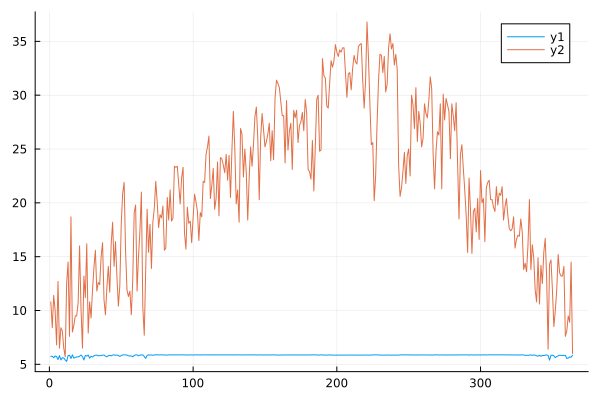

In [27]:
plot(nn(x1)')
plot!(y1')

In [31]:
[x0,x1,x2]

3-element Vector{Matrix{Float64}}:
 [10.2 11.3 … 13.5 13.1]
 [10.5 10.8 … 8.9 14.5]
 [7.8 7.9 … 13.7 11.8]

In [32]:
X=[x0,x1,x2]
Y=[y0,y1,y2]

3-element Vector{Matrix{Float64}}:
 [11.3 12.0 … 13.1 12.3]
 [10.8 8.4 … 14.5 6.0]
 [7.9 10.5 … 11.8 10.5]

In [93]:
model= Chain(Dense(1, 64,), Dense(64, 64,), Dense(64, 1))

Chain(
  Dense(1 => 64),                       # 128 parameters
  Dense(64 => 64),                      # 4_160 parameters
  Dense(64 => 1),                       # 65 parameters
)                   # Total: 6 arrays, 4_353 parameters, 17.379 KiB.

In [84]:
model(x1)

1×364 Matrix{Float64}:
 1.16692  1.20026  0.933536  1.26694  1.11135  …  1.05579  0.989104  1.61146

In [94]:
pre_w=deepcopy(Flux.params(model))

Params([Float32[-0.0021027306; -0.18619877; … ; 0.21615241; 0.20883986;;], Float32[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0  …  0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], Float32[0.20260544 0.1855489 … 0.115336016 0.055386197; -0.01536934 0.18555453 … 0.060931433 -0.19789153; … ; -0.051312726 0.041762847 … -0.18982397 -0.071420416; -0.13799483 -0.029326484 … 0.21355139 0.12798056], Float32[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0  …  0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], Float32[0.2500533 0.23598745 … -0.14524071 0.13554917], Float32[0.0]])

In [95]:
w=Flux.params(model)

Params([Float32[-0.0021027306; -0.18619877; … ; 0.21615241; 0.20883986;;], Float32[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0  …  0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], Float32[0.20260544 0.1855489 … 0.115336016 0.055386197; -0.01536934 0.18555453 … 0.060931433 -0.19789153; … ; -0.051312726 0.041762847 … -0.18982397 -0.071420416; -0.13799483 -0.029326484 … 0.21355139 0.12798056], Float32[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0  …  0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], Float32[0.2500533 0.23598745 … -0.14524071 0.13554917], Float32[0.0]])

In [96]:
grad = Flux.gradient(() -> Flux.mse(model(x1), y1), w)

Grads(...)

In [ ]:
Flux.update!(opt, Flux.params(model), grad)

In [97]:
Flux.Optimise.update!(Descent(0.02),w,grad)

In [100]:
grad1 = Flux.gradient(() -> Flux.mse(model(x2), y2), w)

Grads(...)

In [145]:
grad1[w[5]]

1×64 Matrix{Float32}:
 NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  …  NaN  NaN  NaN  NaN  NaN  NaN  NaN

In [139]:
grad1

Grads(...)

In [101]:
grad .+=grad1

Grads(...)

In [103]:
for (w1, w2) in zip(w, pre_w)
    w1 .= w2
end

In [141]:
Flux.Optimise.update!(Descent(0.01),w,grad1)

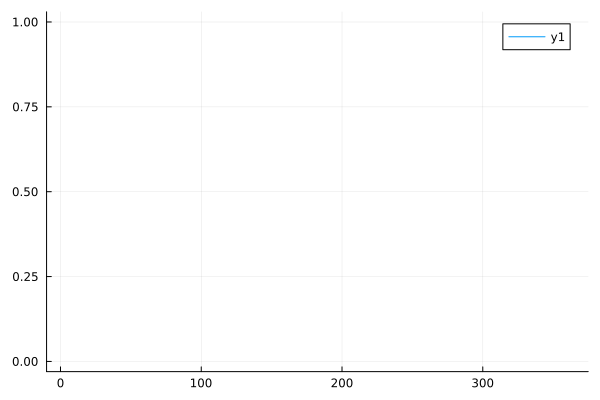

In [142]:
plot(model(x1)')

In [137]:
model= Chain(Dense(1, 64,), Dense(64, 64,), Dense(64, 1))
w=Flux.params(model)

for h in 1:1000
    pre_w=deepcopy(Flux.params(model))
    for i in 1:2
      x=X[i]
      y=Y[i]
      grad = Flux.gradient(() -> Flux.mse(model(x), y), Flux.params(model))
      Flux.Optimise.update!(Descent(0.02),Flux.params(model),grad)
      
      tx=X[i+1]
      ty=Y[i+1]
      grad1 = Flux.gradient(() -> Flux.mse(model(tx), ty), Flux.params(model))
    
      Flux.Optimise.update!(Descent(0.01),Flux.params(model),grad1)
    end
    
end

In [138]:
model(x1)

1×364 Matrix{Float64}:
 NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  …  NaN  NaN  NaN  NaN  NaN  NaN  NaN

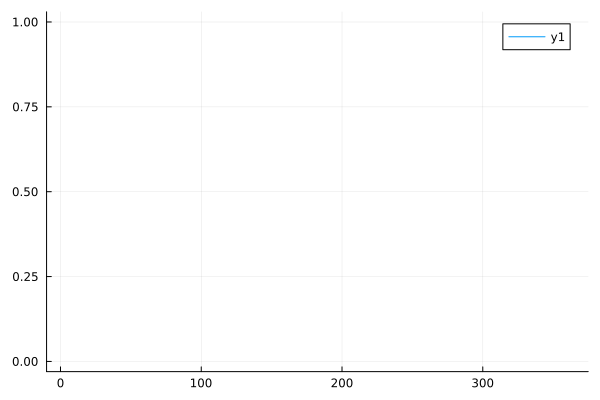

In [135]:
plot(model(x1)')

In [131]:
model= Chain(Dense(1, 64,), Dense(64, 64,), Dense(64, 1))
w=Flux.params(model)
pre_w=deepcopy(Flux.params(model))
for i in 1:2
  x=X[i]
  y=Y[i]
  grad = Flux.gradient(() -> Flux.mse(model(x), y), w)
  Flux.Optimise.update!(Descent(0.02),w,grad)
  
  tx=X[i+1]
  ty=Y[i+1]
  grad1 = Flux.gradient(() -> Flux.mse(model(tx), ty), w)
  for (w1, w2) in zip(w, pre_w)
    w1 .= w2
  end
  

Flux.Optimise.update!(Descent(0.01),w,grad1)
end


In [132]:
model(x2)

1×364 Matrix{Float64}:
 NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  …  NaN  NaN  NaN  NaN  NaN  NaN  NaN

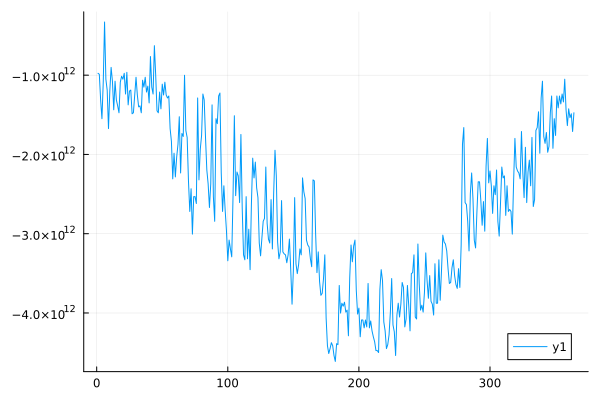

In [128]:
plot(model(x2)')

In [117]:
model(x2)

1×364 Matrix{Float64}:
 NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  …  NaN  NaN  NaN  NaN  NaN  NaN  NaN

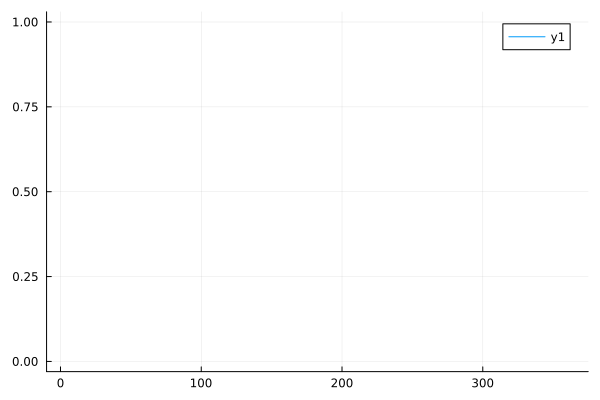

In [110]:
plot(model(x2)')

In [89]:
w=Flux.params(model)
for _ in 1:1000
    pre_w=deepcopy(Flux.params(model))
    for i in 1:2
      x=X[1]
      y=Y[1]
      grad = Flux.gradient(() -> Flux.mse(model(x), y), w)

      
      Flux.Optimise.update!(Descent(0.02),w,grad)
    
      tx=X[i+1]
      ty=Y[i+1]
      grad1 = Flux.gradient(() -> Flux.mse(model(tx), ty), w)
      
      Flux.Optimise.update!(Descent(0.01),w,grad1)
    end
    
end
        



In [88]:
X[2+1]

1×364 Matrix{Float64}:
 7.8  7.9  10.5  12.4  8.7  2.6  8.4  …  13.1  11.4  12.3  11.9  13.7  11.8

In [91]:
model(x2)

1×364 Matrix{Float64}:
 NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  …  NaN  NaN  NaN  NaN  NaN  NaN  NaN

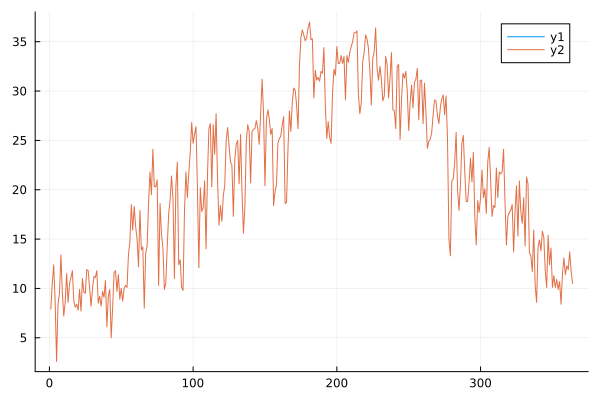

In [90]:
plot(model(x2)')
plot!(y2')

In [36]:
grad[w[3]]

64×64 Matrix{Float32}:
 -0.0579974    -0.162845    -0.161659    …  -0.156471     0.150813
 -0.178631     -0.501241    -0.497561       -0.481542     0.464124
  0.0957118     0.271922     0.269769        0.260609    -0.250822
 -0.0298333    -0.086748    -0.0858773      -0.0825124    0.0791407
 -0.0470318    -0.130633    -0.129766       -0.125861     0.121494
  0.12124       0.337754     0.335418    …   0.32504     -0.313582
  0.0011097     0.00333592   0.00329241      0.00314073  -0.00299884
  0.0816755     0.229175     0.227516        0.220239    -0.212292
  0.0638004     0.184101     0.182466        0.175772    -0.168826
 -0.139739     -0.391701    -0.388888       -0.376513     0.362972
  0.0821603     0.235451     0.233493    …   0.225265    -0.216576
 -0.000749346  -0.00225408  -0.00222414     -0.00212069   0.00202449
 -0.0372248    -0.103993    -0.103257       -0.100015     0.096455
  ⋮                                      ⋱               
 -0.0235812    -0.0657325   -0.0652855     

LoadError: Only reference types can be differentiated with `Params`.

In [66]:
[x1,x2][1]

1×364 Matrix{Float64}:
 10.5  10.8  8.4  11.4  10.0  6.8  12.7  …  14.1  7.6  8.1  9.5  8.9  14.5

In [68]:
x=[x0,x1]

2-element Vector{Matrix{Float64}}:
 [10.2 11.3 … 13.5 13.1]
 [10.5 10.8 … 8.9 14.5]

In [70]:
y=[y0,y1]

2-element Vector{Matrix{Float64}}:
 [11.3 12.0 … 13.1 12.3]
 [10.8 8.4 … 14.5 6.0]

In [ ]:
nn= Chain(Dense(1, 64,tanh), Dense(64, 64,tanh), Dense(64, 1))
w=Flux.params(nn)
dist=Normal(m,s)
task(x)=pdf.(dist,x)'

In [ ]:
for i in 1:1000
    pre_w=deepcopy(Flux.params(nn))
    for i in 1:2
        grad = Flux.gradient(() -> Flux.mse(nn(x[i]), task(y[i])'), w)
        for wi in w
            wi .-Flux.Flux.Optimise.update!(Descent(0.02),wi,grad[wi])
        end
        grad1 = Flux.gradient(() -> Flux.mse(nn(x2), task(y2)'), w)
    end
    
    Flux.Optimise.update!(Descent(0.01),w,grad1)
end
    
        
